In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load data from CSV file
df_online_shoppers_intention = pd.read_csv('online_shoppers_intention.csv')

# Display the first 5 observations
df_online_shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Check for null values
null_values = df_online_shoppers_intention.isnull().sum()

# Calculate percentage of null values
total_rows = len(df_online_shoppers_intention)
null_percentage = (null_values / total_rows) * 100

# Create a DataFrame to display null values and their percentage
null_df = pd.DataFrame({'Null Values': null_values, 'Null Percentage': null_percentage})
null_df

,Null Values,Null Percentage
Administrative,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0
SpecialDay,0,0.0


In [4]:
# Summary statistics
df_online_shoppers_intention.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


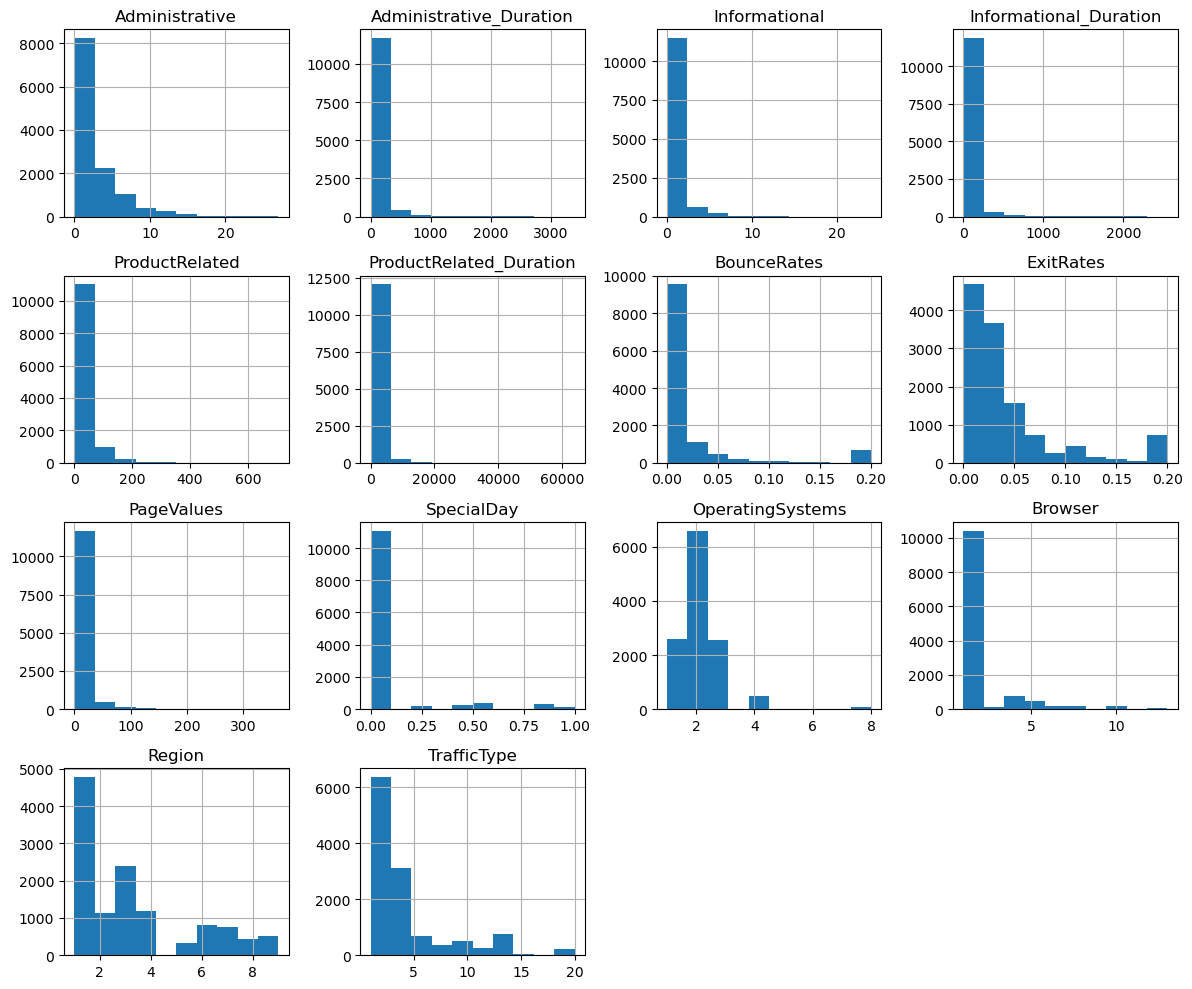

In [5]:
# Data visualization
# Histograms for numerical features
df_online_shoppers_intention.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


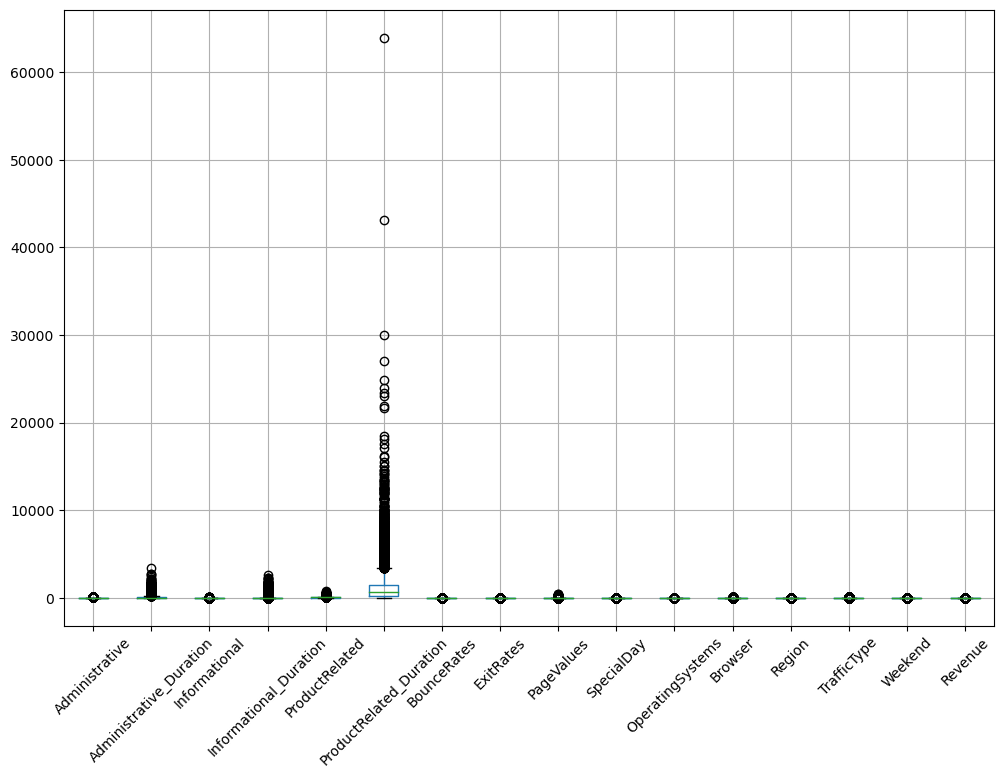

In [6]:
# Box plots for numerical features
df_online_shoppers_intention.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

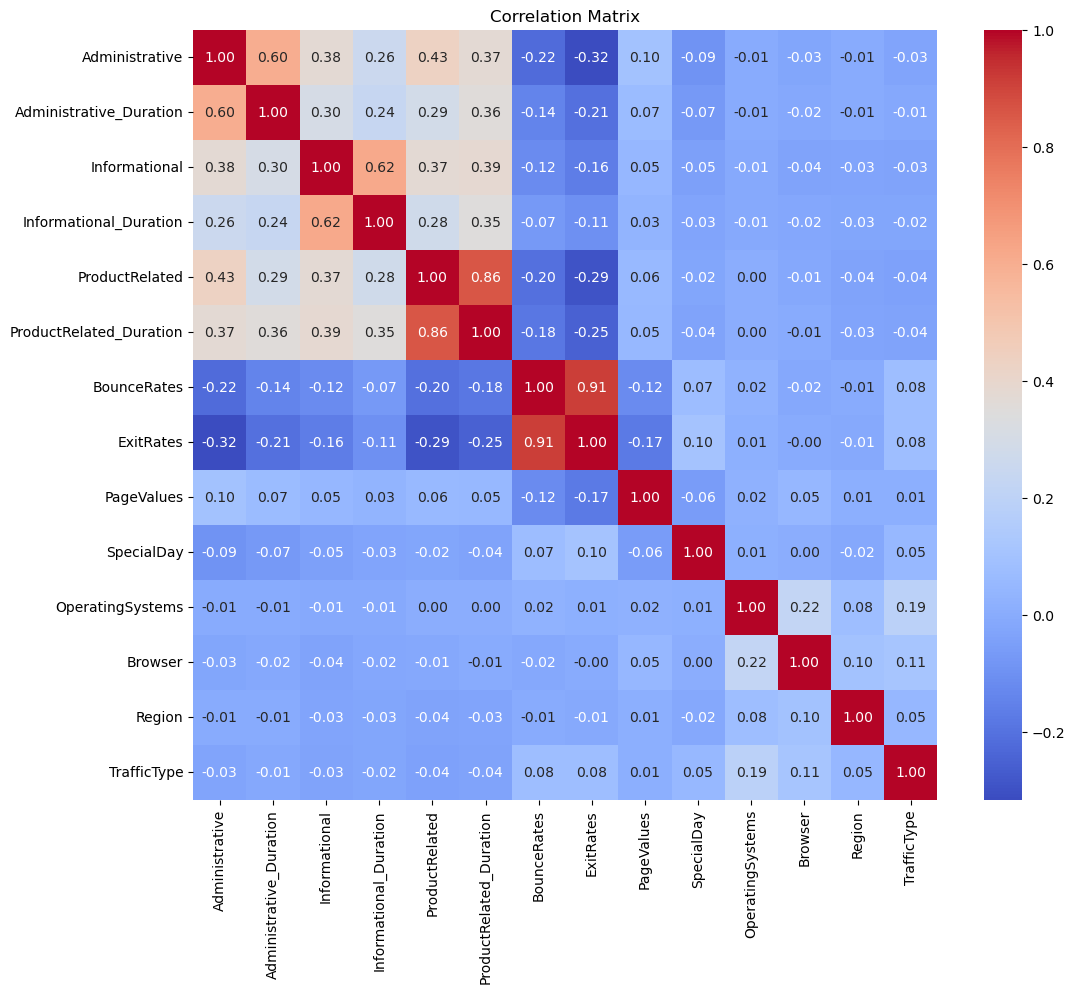

In [7]:
# Correlation matrix
dfnum = df_online_shoppers_intention.select_dtypes(include = 'number')
correlation_matrix = dfnum.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

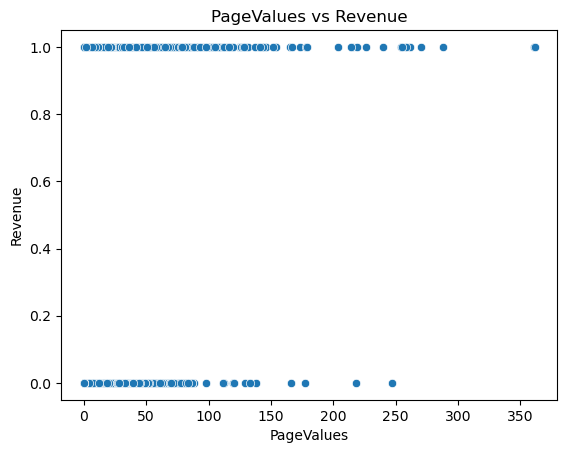

In [8]:
# Feature relationships
# For example, you can use scatter plots to explore the relationship between numerical features and the target variable
sns.scatterplot(x='PageValues', y='Revenue', data=df_online_shoppers_intention)
plt.title('PageValues vs Revenue')
plt.show()

In [9]:
# Perform one-hot encoding
df_online_shoppers_intention_enc = pd.get_dummies(df_online_shoppers_intention, drop_first = True)

In [10]:
df_online_shoppers_intention = df_online_shoppers_intention_enc

In [11]:
!pip install MiniSom

In [14]:
from minisom import MiniSom
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df is your preprocessed DataFrame

# Standardize the features since SOM is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_online_shoppers_intention)

In [15]:
df_online_shoppers_intention = df_online_shoppers_intention.reset_index()

In [17]:
# Determine the grid size for the SOM
# You can adjust the grid size based on your specific requirements
grid_size = (10, 10)  # 10x10 grid

# Initialize the SOM
som = MiniSom(grid_size[0], grid_size[1], X_scaled.shape[1], sigma=0.5, learning_rate=0.5)


In [18]:
# Get the closest neuron for each data point
closest_neurons = np.array([som.winner(x) for x in X_scaled])

# Map the indices of the closest neurons to cluster labels
# We'll assign a unique cluster label to each unique neuron index
neuron_indices = np.unique(closest_neurons, axis=0, return_inverse=True)[1]

# Add cluster labels to the DataFrame
df_online_shoppers_intention['Cluster_SOM'] = neuron_indices

# Analyze the results and visualize clusters


Cluster_SOM
58    670
85    568
11    454
73    373
93    336
     ... 
64     13
59     13
37      9
6       3
90      1
Name: count, Length: 100, dtype: int64


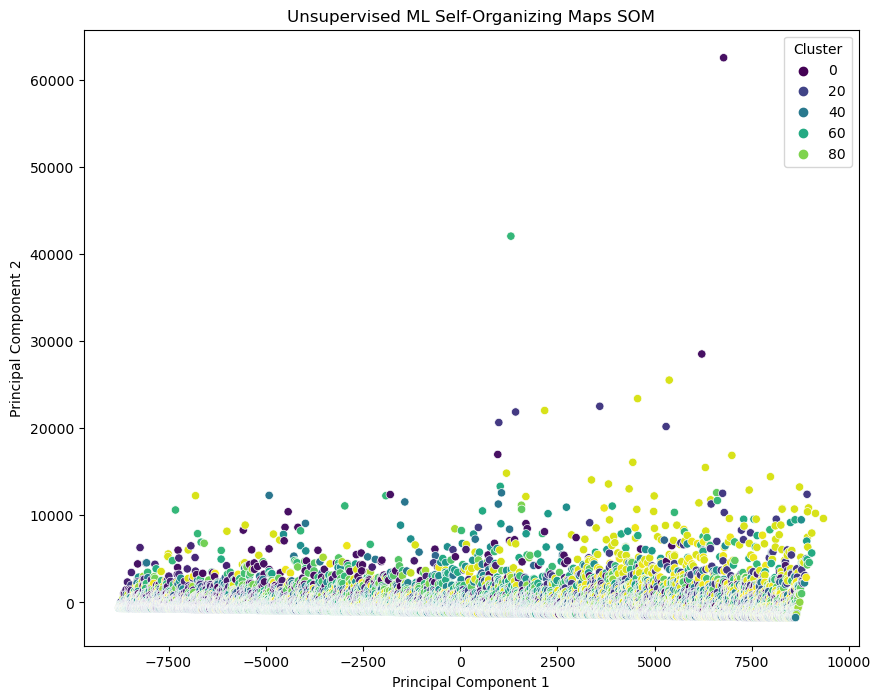

In [19]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_online_shoppers_intention)

# Add PCA components to DataFrame
df_online_shoppers_intention['PCA1'] = X_pca[:, 0]
df_online_shoppers_intention['PCA2'] = X_pca[:, 1]
# Analyze the results
# Display the number of data points in each cluster
print(df_online_shoppers_intention['Cluster_SOM'].value_counts())

# Visualize clusters using scatter plot
# You can use PCA or other dimensionality reduction techniques for visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_SOM', data=df_online_shoppers_intention, palette='viridis')
plt.title('Unsupervised ML Self-Organizing Maps SOM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
